## Linear Regression

In [1]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
m=100
X = 2*np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m, 1)


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size =15)
plt.rc('axes', labelsize= 15)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 15)
plt.rc('ytick', labelsize= 15)

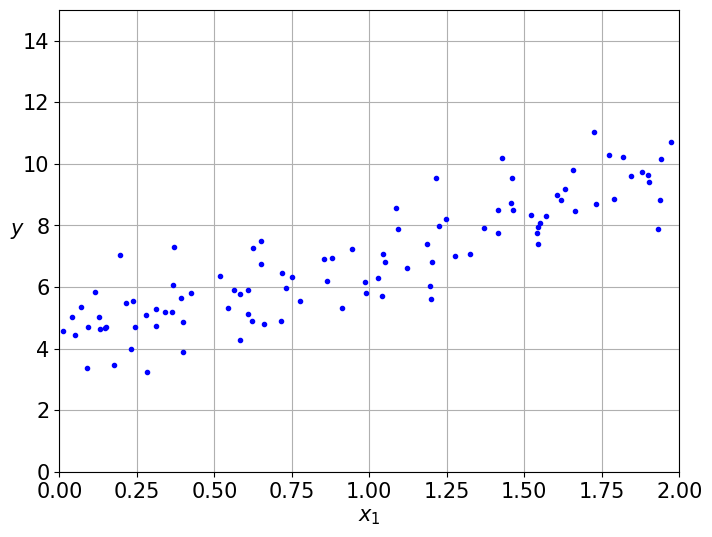

In [3]:
plt.figure(figsize=(8,6))
plt.plot(X,y ,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X)  
best_theta = np.linalg.inv(X_b.T@X_b)@X_b.T@y
print(best_theta)

[[4.21509616]
 [2.77011339]]


In [5]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_predict =X_new_b@best_theta

y_predict

array([[4.21509616],
       [9.75532293]])

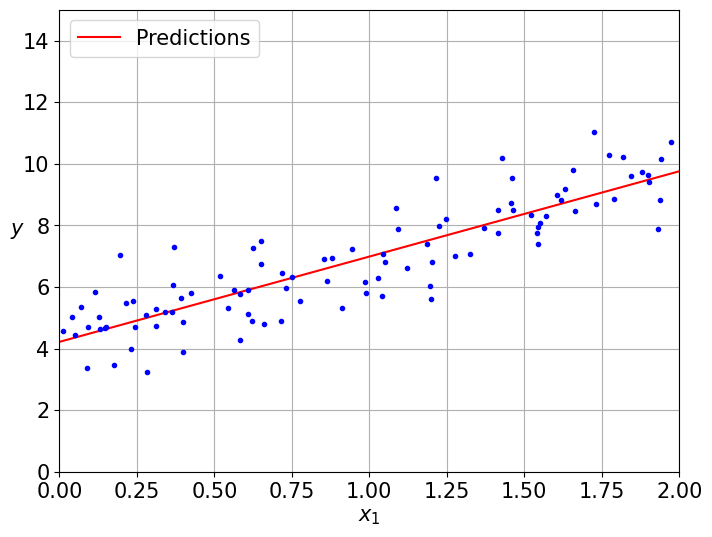

In [6]:
plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_predict = lin_reg.predict(X_new)
lin_predict

array([[4.21509616],
       [9.75532293]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [9]:
residuals ## the lower the better

array([80.6584564])

In [10]:
rank ## number of independent features

np.int32(2)

## Gradient Descent


In [11]:
eta = 0.03  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[4.21507295],
       [2.77013388]])

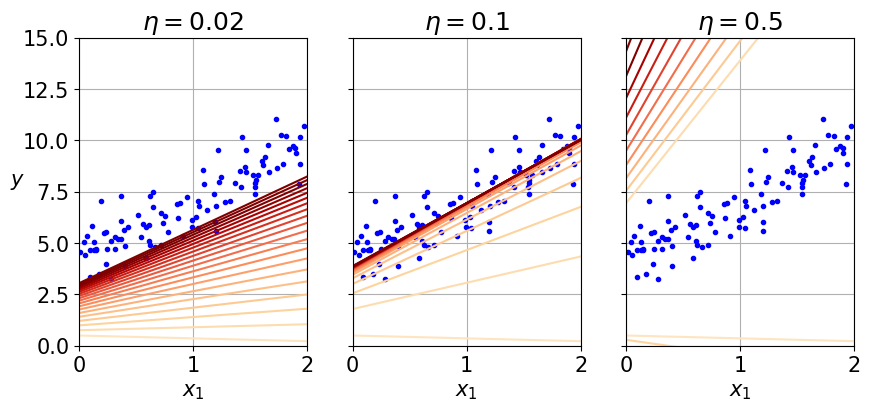

In [13]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

finding best learning rate for SGD using GridSearchCV

In [14]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'eta0': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]}
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3)
grid_search = GridSearchCV(sgd_reg, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X, y.ravel())
grid_search.best_params_

{'eta0': 0.03}

## Stochastic Gradient Descent

In [15]:
theta_path_sg = []

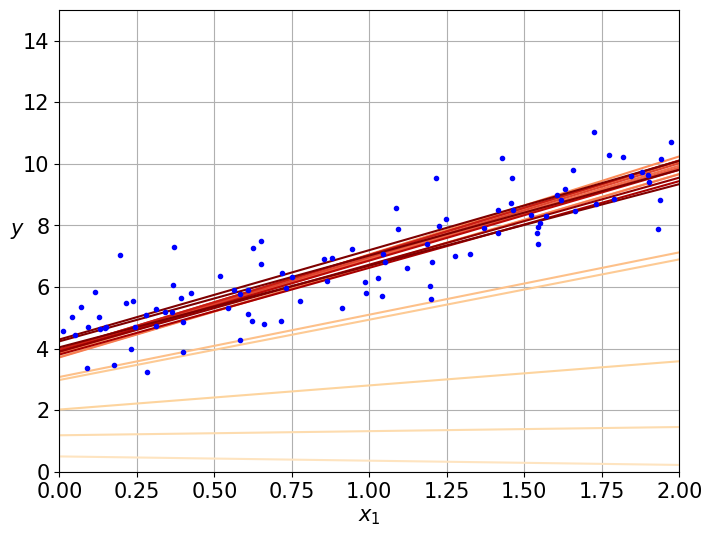

In [16]:
n_epochs= 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/ (t+t1)

np.random.seed(42)
theta = np.random.randn(2,1)

n_shown = 20
plt.figure(figsize=(8,6))

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch ==0 and iteration< n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
     
        random_index = np.random.randint(m)  
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients =  2* xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sg.append(theta) 

plt.plot(X,y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.show()          

In [17]:
theta

array([[4.21076011],
       [2.74856079]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=1e-5, learning_rate="constant", eta0=0.1, random_state=42) 
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1215872]), array([2.68566488]))

## Mini Batch Gradient Descent

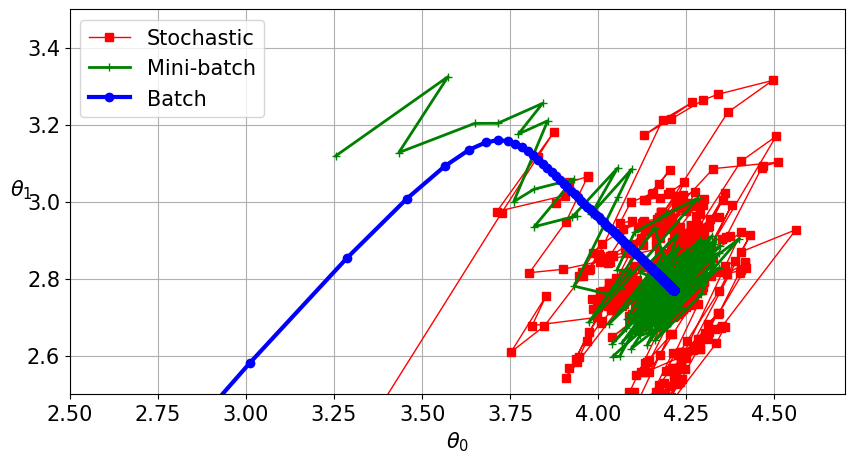

In [19]:
from math import ceil

n_epochs =50 
minibatch_size =20
n_batches_per_epoch = ceil(m / minibatch_size)
np.random.seed(42)
theta = np.random.randn(2,1)
t0, t1 = 200,1000

def learning_schedule(t):
    return t0 / (t+t1)

theta_path_mgd = []

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):

      idx = iteration * minibatch_size
      xi = X_b_shuffled[idx : idx + minibatch_size]
      yi = y_shuffled[idx : idx + minibatch_size]
      gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
      eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
      theta = theta - eta * gradients
      theta_path_mgd.append(theta)
         
         
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sg = np.array(theta_path_sg)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(10,5))
plt.plot(theta_path_sg[:, 0], theta_path_sg[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.5, 4.7, 2.5, 3.5])
plt.grid()
plt.legend(loc="upper left")
plt.show()

## Polynomial Regression


In [20]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

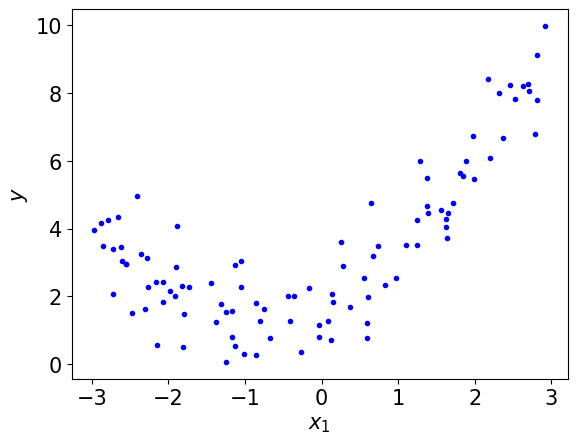

In [21]:
m= 100
X= 6*np.random.rand(m,1) - 3
y= 0.5*X**2 + X + 2 + rnd.randn(m,1) 

plt.plot(X,y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias= False)
X_poly = poly_features.fit_transform(X)


In [23]:
X[0]

array([-0.75275929])

In [24]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

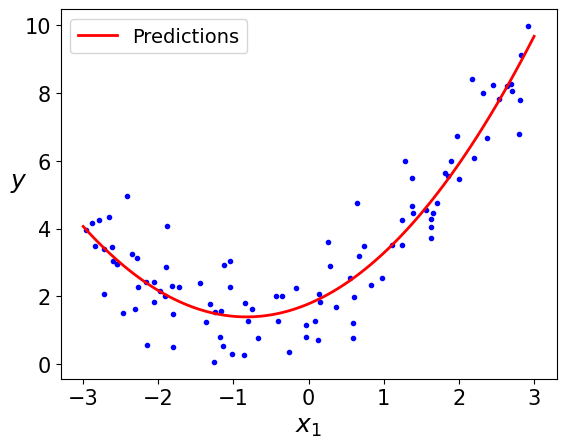

In [26]:
X_new = np.linspace(-3, 3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X,y,'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label= 'Predictions')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

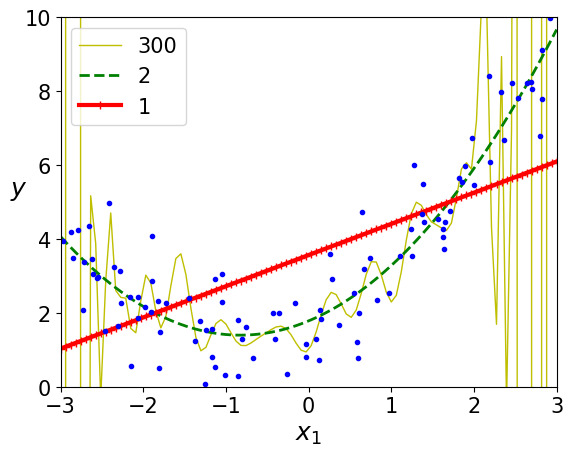

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for style, width, degree in (('y-', 1, 300), ('g--',2, 2),("r-+", 3, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ('poly_features', poly_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
      ])
    polynomial_regression.fit(X, y)
    y_new_big = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_new_big, style, label=str(degree), linewidth= width)



plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

## Learning Curve

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.2,random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)+1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", label="Train")
    plt.plot(np.sqrt(val_errors), "b-", label="Val")
    plt.legend()
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.axis([0,80,0,3])
    plt.title("Learning Curves")
    plt.show()

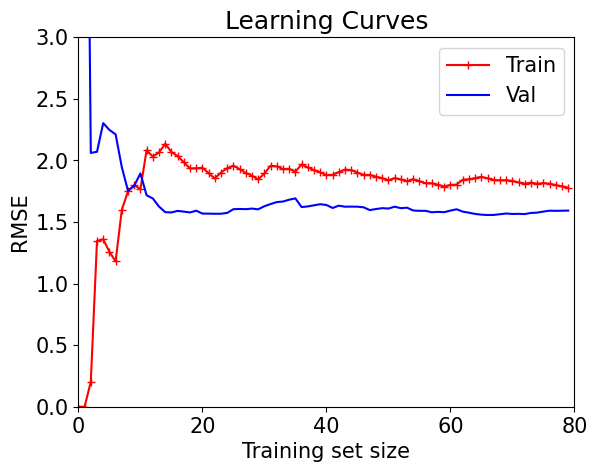

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)



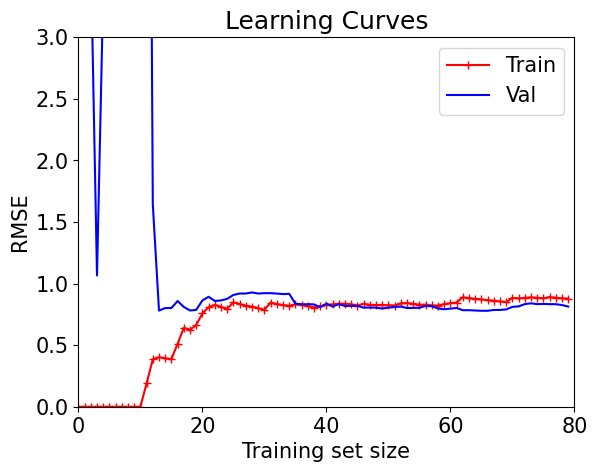

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
  ])

plot_learning_curves(polynomial_regression, X, y)


## Regularized Linear Models


## Ridge Regression

In [31]:
np.random.seed(42)
m= 20
X= 3*np.random.rand(m,1)
y = 0.5 * X + np.random.randn(m,1)/1.5

X_new = np.linspace(0,3,100).reshape(100,1)

In [32]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver= 'cholesky', random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([0.55071465])

In [33]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([0.55072189])

In [34]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kwargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree= 10, include_bias= False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model),
            ])
        model.fit(X,y)
        y_new = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new, style, linewidth= lw, label= f"$\\alpha={alpha}$")
    plt.plot(X, y, 'b.')
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.legend(loc="upper left")    
    plt.axis([0,3,0,4])

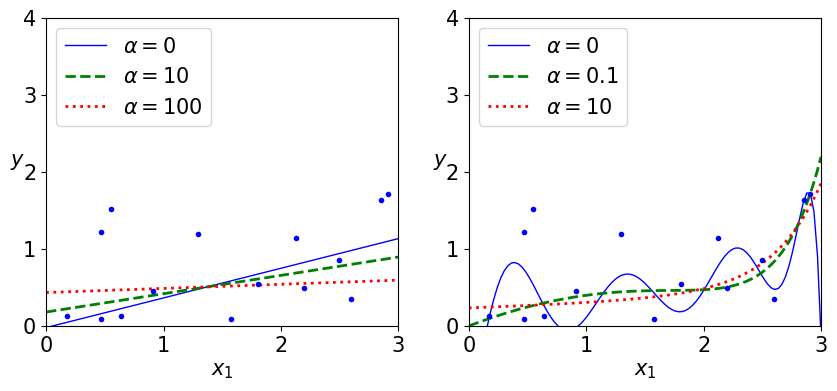

In [35]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Ridge, polynomial= False, alphas=[0, 10, 100])
plt.subplot(122)
plot_model(Ridge, polynomial= True, alphas=[0, 0.1, 10, 1000])
plt.show()

In [36]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([0.55405607])

## Lasso Regression

c:\Users\hassin.nafisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


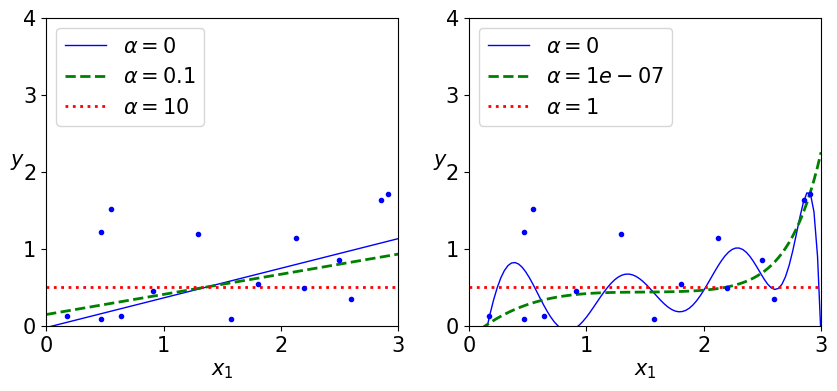

In [37]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Lasso, polynomial= False, alphas=[0, 0.1, 10])
plt.subplot(122)
plot_model(Lasso, polynomial= True, alphas=[0, 10**-7, 1])

plt.show()

In [38]:
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([0.53788174])

## Elastic Net

In [39]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([0.54333232])

## Early Stopping

In [40]:
from sklearn.metrics import root_mean_squared_error

c:\Users\hassin.nafisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hassin.nafisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hassin.nafisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hassin.nafisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\skl

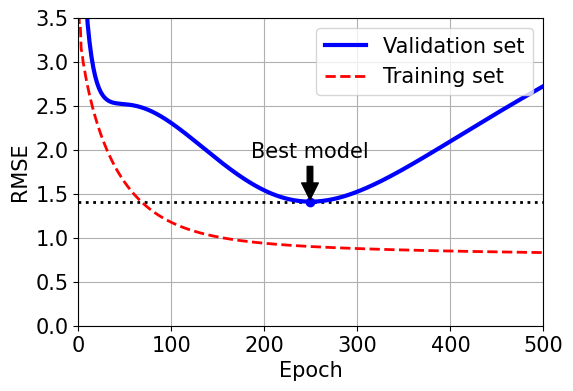

In [48]:
from sklearn.pipeline import make_pipeline 
from copy import deepcopy 
np.random.seed(42)
m=100
X= 6*np.random.rand(m,1)-3
y= 0.5*X**2 + X + 2+ np.random.randn(m,1)
X_train, y_train = X[:m//2], y[:m//2]
X_val, y_val = X[m//2:], y[m//2:]

preprocessing = make_pipeline(PolynomialFeatures(degree= 90, include_bias= False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_val)

sgd_reg = SGDRegressor(penalty=None, eta0= 0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [],[]

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_val, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)
    
    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()
